<a href="https://colab.research.google.com/github/Mbigdeli2003/Fault-Detection/blob/main/TEP_PLS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#PLS on TEP

### Importing Libraries

In [19]:
from google.colab import drive
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.datasets import load_digits
from sklearn.decomposition import FastICA
from sklearn.cross_decomposition import PLSRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

## Importing TEP

In [20]:
##Train
Fault_Free_Trian = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/Fault/TEP Data/Normal 00 train (480x52).xlsx") #replace address from drive
Fault_train = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/Fault/TEP Data/Fault 1-20  train (20x480x52).xlsx") #replace address from drive

##Test

Fault_Free_Test = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/Fault/TEP Data/Normal 00 test (960x52).xlsx") #replace address from drive
Fault_test = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/Fault/TEP Data/Fault 1-20  test  (20x960x52).xlsx") #replace address from drive

In [21]:
# Applying new viarible for uniformung matrix without head
Names = ['Unnamed: 0', 'faultNumber', 'simulationRun', 'sample', 'xmeas_1',
       'xmeas_2', 'xmeas_3', 'xmeas_4', 'xmeas_5', 'xmeas_6', 'xmeas_7',
       'xmeas_8', 'xmeas_9', 'xmeas_10', 'xmeas_11', 'xmeas_12', 'xmeas_13',
       'xmeas_14', 'xmeas_15', 'xmeas_16', 'xmeas_17', 'xmeas_18', 'xmeas_19',
       'xmeas_20', 'xmeas_21', 'xmeas_22', 'xmeas_23', 'xmeas_24', 'xmeas_25',
       'xmeas_26', 'xmeas_27', 'xmeas_28', 'xmeas_29', 'xmeas_30', 'xmeas_31',
       'xmeas_32', 'xmeas_33', 'xmeas_34', 'xmeas_35', 'xmeas_36', 'xmeas_37',
       'xmeas_38', 'xmeas_39', 'xmeas_40', 'xmeas_41', 'xmv_1', 'xmv_2',
       'xmv_3', 'xmv_4', 'xmv_5', 'xmv_6', 'xmv_7', 'xmv_8', 'xmv_9', 'xmv_10',
       'xmv_11']
Fault_train = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/Fault/TEP Data/Fault 1-20  train (20x480x52).xlsx", header=None, names=Names)

### Data Scalling

In [34]:
x_selected= Fault_train[(Fault_train.faultNumber==1)|
                                 (Fault_train.faultNumber==3 )|
                                 (Fault_train.faultNumber==5 )|
                                 (Fault_train.faultNumber==7 )|
                                 (Fault_train.faultNumber==9 )|
                                 (Fault_train.faultNumber==11 )|
                                 (Fault_train.faultNumber==13)|
                                 (Fault_train.faultNumber==15 )|
                                 (Fault_train.faultNumber==17)|
                                 (Fault_train.faultNumber==19)]
x_selected.drop(['faultNumber','Unnamed: 0','simulationRun','sample'],axis=1,inplace=True)
x_selected.drop(['xmeas_2','xmeas_6','xmeas_8','xmeas_12','xmeas_14','xmeas_15','xmeas_17','xmeas_18','xmeas_26','xmeas_27',
'xmeas_28','xmeas_37','xmv_1','xmv_2','xmv_3','xmv_4','xmv_10','xmv_11'],axis=1,inplace=True)
ff = x_selected
df_max_scaled = ff.copy()
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(ff)
tr_s = scaler.transform(ff)
df1=pd.DataFrame(tr_s)
dfarray=df1.values
df2=df1.iloc[1000,:]


<ipython-input-34-80e3b2d6260c>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_selected.drop(['faultNumber','Unnamed: 0','simulationRun','sample'],axis=1,inplace=True)
<ipython-input-34-80e3b2d6260c>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_selected.drop(['xmeas_2','xmeas_6','xmeas_8','xmeas_12','xmeas_14','xmeas_15','xmeas_17','xmeas_18','xmeas_26','xmeas_27',


In [27]:
x_selected.shape

(5000, 34)

In [28]:
y=Fault_test
y_selected= y[(y.faultNumber==1)|
                                 (y.faultNumber==3 )|
                                 (y.faultNumber==5 )|
                                 (y.faultNumber==7 )|
                                 (y.faultNumber==9 )|
                                 (y.faultNumber==11 )|
                                 (y.faultNumber==13)|
                                 (y.faultNumber==15 )|
                                 (y.faultNumber==17)|
                                 (y.faultNumber==19)]

y_selected.drop(['faultNumber','Unnamed: 0','simulationRun','sample'],axis=1,inplace=True)
y_selected.drop(['xmeas_2','xmeas_6','xmeas_8','xmeas_12','xmeas_14','xmeas_15','xmeas_17','xmeas_18','xmeas_26','xmeas_27',
'xmeas_28','xmeas_37','xmv_1','xmv_2','xmv_3','xmv_4','xmv_10','xmv_11'],axis=1,inplace=True)
ff_1 = y_selected
df_max_scaled = ff_1.copy()
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(ff_1)
test = scaler.transform(ff_1)
testdata=pd.DataFrame(test)

<ipython-input-28-d295319eaa95>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_selected.drop(['faultNumber','Unnamed: 0','simulationRun','sample'],axis=1,inplace=True)
<ipython-input-28-d295319eaa95>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_selected.drop(['xmeas_2','xmeas_6','xmeas_8','xmeas_12','xmeas_14','xmeas_15','xmeas_17','xmeas_18','xmeas_26','xmeas_27',


In [29]:
test.shape

(9600, 34)

## PLS

### Bulding Lable MAtrix for PLS2

In [30]:
n=34
m=5000
k=0
Lable=np.zeros((5000,10))
a=np.ones((500,1))
for i in range(0,10,1):
    Lable[k:k+500,i]=1
    k=k+500

<function matplotlib.pyplot.show(close=None, block=None)>

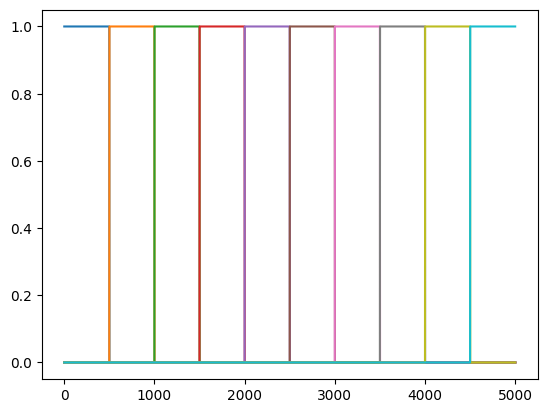

In [37]:
np.sum(Lable)
plt.plot(Lable)
plt.show


In [63]:
Lable.shape

(5000, 10)

In [66]:
#choose the number of n-components for PLS
n_components =10

In [38]:
pls2 = PLSRegression(n_components =10)

In [39]:
pls2.fit(tr_s, Lable)

PLSRegression(n_components=10)

In [76]:
Xt=pls2.transform(tr_s)

<ipython-input-91-6442934e6937>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  our_faulty_classes_2.drop(['xmeas_2','xmeas_6','xmeas_8','xmeas_12','xmeas_14','xmeas_15','xmeas_17','xmeas_18','xmeas_26','xmeas_27',


[Text(0.0, 0, ''),
 Text(1.0, 0, ''),
 Text(2.0, 0, ''),
 Text(3.0, 0, ''),
 Text(4.0, 0, ''),
 Text(5.0, 0, ''),
 Text(6.0, 0, ''),
 Text(7.0, 0, ''),
 Text(8.0, 0, '')]

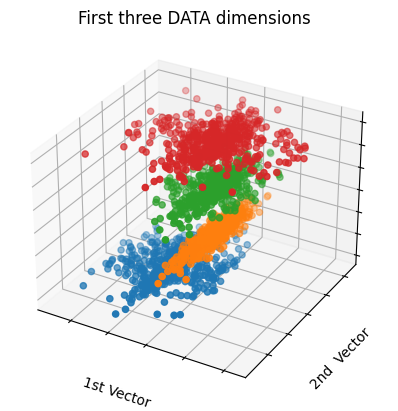

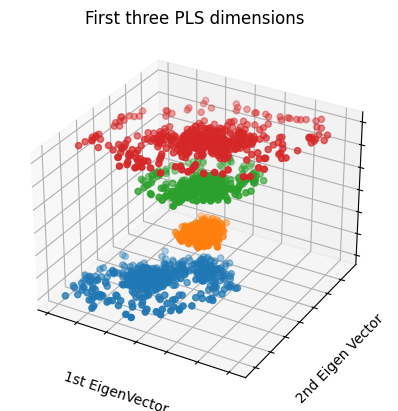

In [91]:
import mpl_toolkits.mplot3d
Fault_train = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/Fault/TEP Data/Fault 1-20  train (20x480x52).xlsx", header=None, names=Names)
our_faulty_classes_2= Fault_train[(Fault_train.faultNumber==1)|
                                 (Fault_train.faultNumber==3 )|
                                 (Fault_train.faultNumber==5 )|
                                 (Fault_train.faultNumber==7 )|
                                 (Fault_train.faultNumber==9 )|
                                 (Fault_train.faultNumber==11 )|
                                 (Fault_train.faultNumber==13)|
                                 (Fault_train.faultNumber==15 )|
                                 (Fault_train.faultNumber==17)|
                                 (Fault_train.faultNumber==19)]
our_faulty_classes_2.drop(['xmeas_2','xmeas_6','xmeas_8','xmeas_12','xmeas_14','xmeas_15','xmeas_17','xmeas_18','xmeas_26','xmeas_27',
'xmeas_28','xmeas_37','xmv_1','xmv_2','xmv_3','xmv_4','xmv_10','xmv_11'],axis=1,inplace=True)
n1=2
n2=3
#Determining Classes
Cl_1=0
Cl_2=500
Cl_3=1000
Cl_4=1500
Cl_5=2000
fig = plt.figure(1)
ax = fig.add_subplot(111, projection="3d")
scatter = ax.scatter(tr_s[Cl_1:Cl_2, n1],tr_s[Cl_1:Cl_2, n2],our_faulty_classes_2.iloc[Cl_1:Cl_2,1])
scatter = ax.scatter(tr_s[Cl_2:Cl_3, n1],tr_s[Cl_2:Cl_3, n2],our_faulty_classes_2.iloc[Cl_2:Cl_3,1])
scatter = ax.scatter(tr_s[Cl_3:Cl_4, n1],tr_s[Cl_3:Cl_4, n2],our_faulty_classes_2.iloc[Cl_3:Cl_4,1])
scatter = ax.scatter(tr_s[Cl_4:Cl_5, n1],tr_s[Cl_4:Cl_5, n2],our_faulty_classes_2.iloc[Cl_4:Cl_5,1])
ax.set_title("First three DATA dimensions")
ax.set_xlabel("1st Vector")
ax.xaxis.set_ticklabels([])
ax.set_ylabel("2nd  Vector")
ax.yaxis.set_ticklabels([])
ax.set_zlabel("3rd Vector")
ax.zaxis.set_ticklabels([])
fig = plt.figure(2)
ax = fig.add_subplot(111, projection="3d")
scatter = ax.scatter(Xt[Cl_1:Cl_2, n1],Xt[Cl_1:Cl_2, n2],our_faulty_classes_2.iloc[Cl_1:Cl_2,1])
scatter = ax.scatter(Xt[Cl_2:Cl_3, n1],Xt[Cl_2:Cl_3, n2],our_faulty_classes_2.iloc[Cl_2:Cl_3,1])
scatter = ax.scatter(Xt[Cl_3:Cl_4, n1],Xt[Cl_3:Cl_4, n2],our_faulty_classes_2.iloc[Cl_3:Cl_4,1])
scatter = ax.scatter(Xt[Cl_4:Cl_5, n1],Xt[Cl_4:Cl_5, n2],our_faulty_classes_2.iloc[Cl_4:Cl_5,1])
ax.set_title("First three PLS dimensions")
ax.set_xlabel("1st EigenVector")
ax.xaxis.set_ticklabels([])
ax.set_ylabel("2nd Eigen Vector")
ax.yaxis.set_ticklabels([])
ax.set_zlabel("3rd Eigenvector")
ax.zaxis.set_ticklabels([])

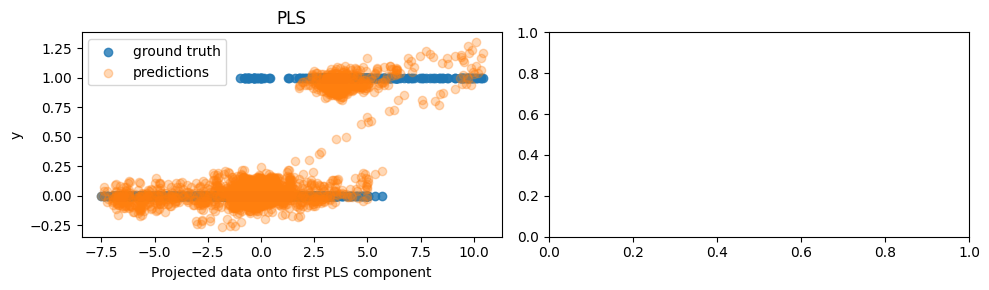

In [88]:
pls2.fit(tr_s, Lable)

fig, axes = plt.subplots(1,2, figsize=(10, 3))
axes[0].legend()
axes[0].scatter(pls2.transform(tr_s)[:,0], Lable[:,0], alpha=0.8, label="ground truth")
axes[0].scatter(
   pls2.transform(tr_s)[:,0], pls2.predict(tr_s)[:,0], alpha=0.3, label="predictions")
axes[0].set(xlabel="Projected data onto first PLS component", ylabel="y", title="PLS")
axes[0].legend()
plt.tight_layout()
plt.show()

In [62]:
pls2.transform(tr_s).shape
Lable[:,0:9].shape

(5000, 9)

In [ ]:
score(Y_pred)

NameError: ignored

In [ ]:
import plotly.express as px
lda = LinearDiscriminantAnalysis(n_components=5)
X_train_LDA = lda.fit_transform(tr_s, lbl)
#X_train_LDA = lda.fit(tr_s, lbl).transform(tr_s)
#_pred = lda.predict(X_test)
#print(accuracy_score(y_test, y_pred))
cmap = plt.cm.hot
color=cmap(lbl)
fig = px.scatter(x= X_train_LDA[:,0],
                    y= X_train_LDA[:,1],
                   color = y_train, width=800, height=800)
fig.update_traces(marker={'size': 2})
fig.show()
# score(np.transpose(tr_s), np.diag(Lable), sample_weight=None)
#X_r2 = lda.fit(np.transpose(tr_s), Lable).transform(tr_s)
#plt.figure(figsize=(15, 8))
# plotting the graph
#plt.scatter(X_r2[:,0],X_r2[:,1],  c=dataset.target)
#plt.show()

ValueError: ignored

In [ ]:
X_train_LDA

array([], shape=(5000, 0), dtype=float64)